## 2)Stock Market Prediction And Forecasting Using Stacked LSTM

## Task2

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
50/50 [==============================] - 11s 64ms/step - loss: 0.0102
Epoch 2/50
50/50 [==============================] - 3s 70ms/step - loss: 0.0014
Epoch 3/50
50/50 [==============================] - 3s 61ms/step - loss: 0.0013
Epoch 4/50
50/50 [==============================] - 4s 75ms/step - loss: 0.0012
Epoch 5/50
50/50 [==============================] - 3s 63ms/step - loss: 0.0012
Epoch 6/50
50/50 [==============================] - 4s 71ms/step - loss: 9.7483e-04
Epoch 7/50
50/50 [==============================] - 3s 60ms/step - loss: 9.5089e-04
Epoch 8/50
50/50 [==============================] - 4s 73ms/step - loss: 8.3956e-04
Epoch 9/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0011
Epoch 10/50
50/50 [==============================] - 3s 70ms/step - loss: 7.8234e-04
Epoch 11/50
50/50 [==============================] - 3s 61ms/step - loss: 7.5240e-04
Epoch 12/50
50/50 [==============================] - 3s 69ms/step - loss: 7.7396e-04
Epoch 13/50


In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = np.mean(np.square(y_test-y_pred))
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

13/13 [==============================] - 0s 29ms/step
MSE:  0.08378485380277015
RMSE:  0.28945613450533425


In [12]:
# Make predictions
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

62/62 [==============================] - 1s 20ms/step


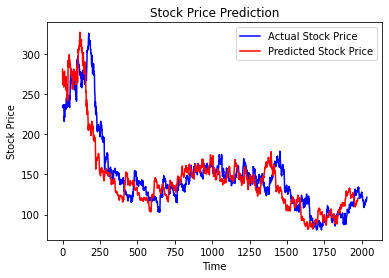

In [13]:
# Plot the predicted stock prices against the actual stock prices
plt.plot(df['Close'].values, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()